#### <b style="color:red"> 검정을 왜 하느냐!!!!!!!!!!!!!!!!!!!</b>
####  타당성을 위함!!!!!!!!!!!!!!!!!!!!!!!!!!
#### 사람 찌른다! X
####  꼬맬려면 찔러야겠지? O (타당하다!)

# 카이제곱 검정(Chi-square test)

- 범주형 변수들 간의 연관성을 분석하기 위해 결합 분포를 활용하는 방법
      - 연령 같은 변수는 연령대 와 같은 서열 척도로 변환해서 사용할 수 있음

- 기본 원리는 변수들 간의 범주를 동시에 교차하는 교차표를 만들어 각각의 빈도와 비율을 통해 변수 상호 간의 독립성과 관련성을 분석

- 교차분석은 상관 분석과는 다르게 연관성의 정도를 수치로 표현가능
    - 대신 검정 통계량 카이 제곱을 통해 변수간의 연관성이 없다는 귀무가설을 기각하는 지 여부로 상관성이 있고 없음을 판단

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/smoker.csv")

In [4]:
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [5]:
df.shape

(131, 2)

In [7]:
df.describe()

,sex,smoke
count,131,131
unique,2,2
top,male,Non-Smoker
freq,69,90


In [8]:
# 항목별 집계
df.groupby(["sex", "smoke"])["smoke"].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

- 남성과 여성의 흡연자와 비흡연자수 현황을 파악
- 여성은 62명중 12 명이 흡연, 남성은 69명중 29명이 흡연자

# 핵심 문법 _ crosstab

In [13]:
# 카이제곱 검정용 데이터셋 가공(교차표 생성)
crosstab = pd.crosstab(df["sex"], df["smoke"]) # 행에는 sex, 열에는 smoker
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


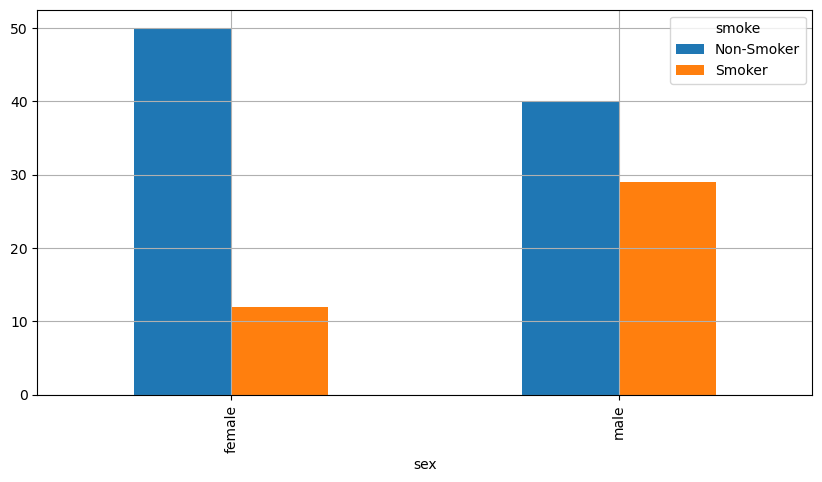

In [14]:
# 성별별 흡연자 수 시각화
crosstab.plot(
    kind = "bar",
    figsize = (10,5)
)
plt.grid()
plt.show()

- 카이제곱 검정을 하기에 앞서 항목별 분포를 막대그래프로 시각화

- 눈으로 보기에도 남성과 여성의 흡연자 비율 차이가 크게 남

- 이러한 차이가 <b>통계적으로 유의미한 차이</b>인지 확인하기 위해 카이제곱 검정 수행

In [15]:
# 카이제곱 검정
chiresult = stats.chi2_contingency(crosstab, correction = False)
print(f"Chi square: {chiresult[0]}")
print(f"P-value : {chiresult[1]}")

Chi square: 7.8081404703715105
P-value : 0.005201139711454792


In [19]:
# 카이제곱 검정
chiresult = stats.chi2_contingency(crosstab, correction = True)
# correction : 표본의 크기가 작을 때 보정을 수행, 일반적으로는 True 를 사용함
# 전체 셀의 개수가 5개 미만인 경우에 보정을 함... 혹은 전체데이터수가 40개 이하...
# 이런 기준은 알아서 하구
# pvalue 만 봤을때 차이가 없네; 하면 그냥 True 든 False 든... 상관없어요
# 논문을 쓸때는 전문가에게 ...문의하세요...
# (텔레그램에 논문을 써주는 인간이 있다...생gpt들중에 빛의 세계에 있는 친구들도 있다...! 그들에게 자문하십셔)
print(f"Chi square: {chiresult[0]}")
print(f"P-value : {chiresult[1]}")

Chi square: 6.789242038107618
P-value : 0.009170883871905303


- P-value 변수들의 관계가 차이가 있음을 통계적으로 알 수있다.